#Import Library

In [81]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Read Dataset

In [82]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df= data

#Membagi data menjadi fitur dan target

In [83]:
X = df.drop(columns='DEATH_EVENT')  # Fitur (Semua kecuali DEATH_EVENT)
y = df['DEATH_EVENT']  # Target (DEATH_EVENT)

X berisi semua fitur dengan menggunakan fungsi .drop() untuk menghilangkan kolom DEATH_EVENT.

y adalah target yang hanya berisi kolom DEATH_EVENT.

In [84]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Membagi dataset menjadi training dan validation set dengan rasio 80:20

## Normalisasi fitur menggunakan StandardScaler

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

StandardScaler digunakan untuk menormalisasi fitur, sehingga setiap fitur memiliki mean = 0 dan standard deviation = 1.

scaler.fit_transform(X_train): Melakukan fit (mempelajari mean dan std dev) pada data training, lalu langsung melakukan transformasi pada data tersebut.

scaler.transform(X_val): Melakukan transformasi pada data validation menggunakan skala yang sama dari data training tanpa mempelajari ulang.

#Membangun model sequential

In [89]:
model = Sequential()

# Menambahkan input layer dengan 12 neuron (sesuai dengan jumlah fitur) dan 2 hidden layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))  # Hidden Layer 1
model.add(Dense(128, activation='relu'))  # Hidden Layer 2

# Mengubah output layer menjadi 1 neuron dengan aktivasi sigmoid untuk klasifikasi biner
model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Kompilasi model menggunakan Adam optimizer dan binary crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Sequential model dibuat untuk menambahkan lapisan secara berurutan.

Dua hidden layers dengan masing-masing 256 dan 128 neuron menggunakan fungsi aktivasi relu untuk menangani non-linearitas.

Output layer memiliki 1 neuron dengan aktivasi sigmoid untuk klasifikasi biner (0 dan 1).

Pakai Adam optimizer dan binary crossentropy sebagai loss function karena ini adalah masalah klasifikasi biner, juga pakai accuracy sebagai metrik evaluasi.

#Melatih model dengan data training dan validasi

In [90]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6078 - loss: 0.6442 - val_accuracy: 0.6333 - val_loss: 0.6416
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7984 - loss: 0.4741 - val_accuracy: 0.7000 - val_loss: 0.5998
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8089 - loss: 0.4035 - val_accuracy: 0.7500 - val_loss: 0.5418
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8868 - loss: 0.3288 - val_accuracy: 0.7500 - val_loss: 0.5537
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8624 - loss: 0.3393 - val_accuracy: 0.8000 - val_loss: 0.5509
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8772 - loss: 0.3064 - val_accuracy: 0.7667 - val_loss: 0.6011
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8878 - loss: 0.2849 - val_accuracy: 0.8000 - val_loss: 0.5815
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8957 - loss: 0.2424 - val_accuracy: 0.7833 - val_loss: 0.6135

X_train, y_train: Data fitur dan target untuk training.

epochs=100: Jumlah iterasi penuh untuk melatih model.

batch_size=32: Jumlah sampel per batch untuk pembaruan bobot.

validation_data=(X_val, y_val): Data validasi untuk mengevaluasi performa model pada setiap epoch.

verbose=1: Menampilkan hasil pelatihan secara detail di setiap epoch.

# Evaluasi akurasi pada data training dan validasi

In [91]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Validation Accuracy: 71.67%


model.evaluate(X_train, y_train): Mengevaluasi performa model pada data training.

model.evaluate(X_val, y_val): Mengevaluasi performa model pada data validasi.

print: Menampilkan akurasi training dan validasi dengan format dua desimal.

# Melakukan prediksi dengan model pada data validation

In [92]:
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).astype(int)  # Membulatkan prediksi ke 0 atau 1

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Validation Accuracy: 71.67%


Validation Accuracynya 71.67%

#Visualisasi

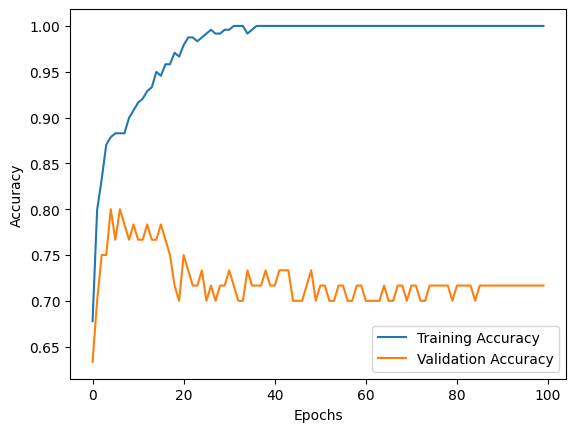

In [93]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Hasil validationnya masih kurang valid karena masih jauh dengan training accuracy.